In [441]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error

In [442]:
zomato=pd.read_csv(r"E:\GREAT LEARNING\mini project - ML\Project 3\zomato.csv")

In [443]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [444]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [445]:
zomato.dtypes #(rate,approx_cost(for two people))

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

<Axes: >

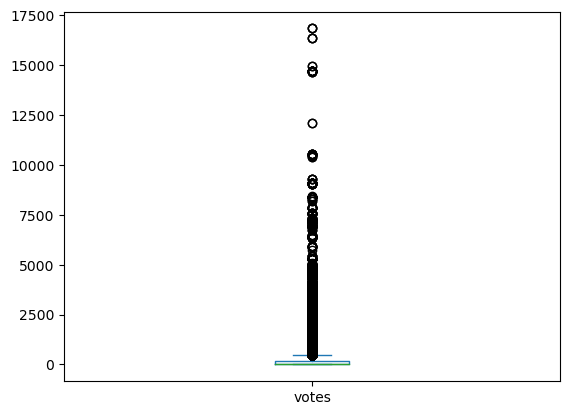

In [446]:
zomato.plot(kind='box')

In [447]:
zomato.skew()

votes    7.547819
dtype: float64

In [448]:
zomato.kurt()

votes    88.866738
dtype: float64

In [449]:
zomato.shape

(51717, 17)

In [450]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [451]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [452]:
zomato.std()

votes    803.838853
dtype: float64

In [453]:
zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [454]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [455]:
zomato['rate'] = zomato['rate'].apply(lambda x : str(x).split("/")[0])

In [456]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [457]:
zomato['rate'] = zomato['rate'].replace('NEW', np.nan)
zomato['rate']=zomato['rate'].replace('-',np.nan)

In [458]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', 'nan',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [459]:
zomato['rate'] = zomato['rate'].astype('float64')

In [460]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [461]:
zomato['rate'] = zomato['rate'].fillna(0).astype(float)

In [462]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [463]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [464]:
zomato.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [465]:
zomato['rate'].unique

<bound method Series.unique of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    0.0
51714    0.0
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64>

In [466]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [467]:
zomato.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [468]:
zomato["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [469]:
zomato["approx_cost(for two people)"] = zomato["approx_cost(for two people)"].apply(lambda x : str(x).replace(",", ""))

In [470]:
zomato["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [471]:
zomato["approx_cost(for two people)"] = zomato['approx_cost(for two people)'].astype('float64')

In [472]:
zomato.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [473]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [474]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [475]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

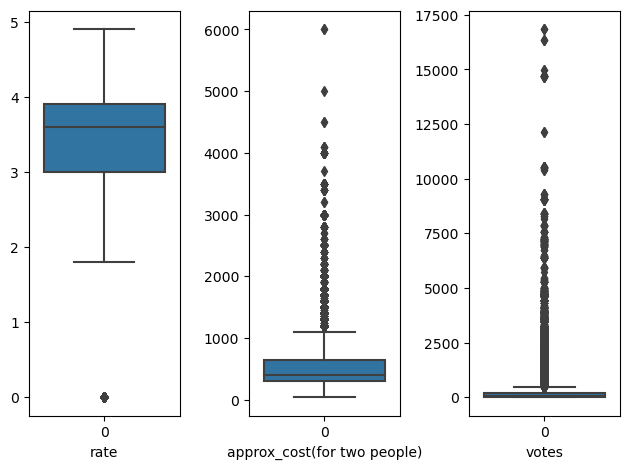

In [476]:
plt.subplot(1,3,1)
sns.boxplot(zomato["rate"])
plt.xlabel("rate")
plt.subplot(1,3,2)
sns.boxplot(zomato["approx_cost(for two people)"])
plt.xlabel("approx_cost(for two people)")
plt.subplot(1,3,3)
sns.boxplot(zomato["votes"])
plt.xlabel("votes")
plt.tight_layout()

In [477]:
#outliers are presnt 

In [480]:
zomato_slr=zomato.drop(['url', 'address', 'name','phone','reviews_list',"location"], axis=1)
zomato_slr.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


In [487]:

print(zomato_slr.shape)

(51717, 11)


In [488]:
zomato_slr.isnull().sum()

online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [489]:
zomato_slr['menu_item'].replace('[]',np.nan,inplace=True)


In [490]:
zomato_slr['menu_item'].isnull().sum()

39617

In [491]:
(zomato_slr['menu_item'].isnull().sum()/zomato_slr.shape[0])*100

76.60343794110254

In [204]:
#hence we shall drop "menu_item"

In [492]:
zomato_slr.drop('menu_item',axis=1,inplace=True)

In [493]:
zomato_slr.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [494]:
zomato_slr["listed_in(type)"].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [495]:
zomato_slr.drop("rest_type",axis=1)

,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,No,No,0.0,0,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,No,No,0.0,0,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,236,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [496]:
zomato_slr.head(5)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [497]:
zomato_slr.rename(columns={"approx_cost(for two people)":"cost_for_2"},inplace=True)

In [499]:
zomato_slr.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'cost_for_2', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [500]:
zomato_slr.isnull().sum()

online_order           0
book_table             0
rate                   0
votes                  0
rest_type            227
dish_liked         28078
cuisines              45
cost_for_2           346
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [501]:
zomato_slr.drop("dish_liked",axis=1,inplace=True)

In [502]:
zomato_slr.dropna(axis=0,inplace=True)

In [503]:
zomato_slr.drop("rest_type",axis=1,inplace=True)

In [504]:
zomato_slr.shape

(51148, 8)

In [505]:
zomato_slr

,online_order,book_table,rate,votes,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Continental,1500.0,Pubs and bars,Whitefield
51713,No,No,0.0,0,Finger Food,600.0,Pubs and bars,Whitefield
51714,No,No,0.0,0,Finger Food,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,236,Finger Food,2500.0,Pubs and bars,Whitefield


In [506]:
zomato_slr["cuisines"]

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51148, dtype: object

In [507]:
len(("North Indian, Chinese".split(",")))

2

In [508]:
zomato_slr.shape

(51148, 8)

In [509]:
zomato_slr["cuisines"]=zomato_slr["cuisines"].apply(lambda x: len((x.split(","))))


In [510]:
zomato_slr["cuisines"]=zomato_slr["cuisines"].astype(object)

In [511]:
zomato_slr.head()

,online_order,book_table,rate,votes,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,3,800.0,Buffet,Banashankari
1,Yes,No,4.1,787,3,800.0,Buffet,Banashankari
2,Yes,No,3.8,918,3,800.0,Buffet,Banashankari
3,No,No,3.7,88,2,300.0,Buffet,Banashankari
4,No,No,3.8,166,2,600.0,Buffet,Banashankari


In [513]:
df=zomato_slr[~zomato_slr.duplicated()]
df

,online_order,book_table,rate,votes,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,3,800.0,Buffet,Banashankari
1,Yes,No,4.1,787,3,800.0,Buffet,Banashankari
2,Yes,No,3.8,918,3,800.0,Buffet,Banashankari
3,No,No,3.7,88,2,300.0,Buffet,Banashankari
4,No,No,3.8,166,2,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,1,1500.0,Pubs and bars,Whitefield
51713,No,No,0.0,0,1,600.0,Pubs and bars,Whitefield
51714,No,No,0.0,0,1,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,236,1,2500.0,Pubs and bars,Whitefield


In [514]:
df.isnull().sum()

online_order       0
book_table         0
rate               0
votes              0
cuisines           0
cost_for_2         0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [515]:
df.shape

(45082, 8)

In [228]:
df.rename(columns={"listed_in(type)":"listed_type",
           "listed_in(city)":"listed_city"},inplace=True)

In [229]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'cuisines', 'cost_for_2',
       'listed_type', 'listed_city'],
      dtype='object')

In [230]:
df["listed_city"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [516]:
#feature engineering to reduce the class

In [231]:
Blr_south=['Banashankari','Bannerghatta Road','BTM','Basavanagudi','Jayanagar','JP Nagar','Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block','Sarjapur Road','Whitefield','Electronic City','HSR','Bellandur']
len(Blr_south)

15

In [232]:
Blr_north=['Rajajinagar','Church Street','MG Road','Marathahalli','New BEL Road','Old Airport Road','Residency Road','Malleshwaram','Marathahalli','Frazer Town','Indiranagar','Brigade Road','Kalyan Nagar','Kammanahalli','Brookefield']
len(Blr_north)

15

In [233]:
df["listed_city"].apply(lambda x : "B_North" if x in Blr_north else "B_South" ).value_counts()

B_South    27145
B_North    17937
Name: listed_city, dtype: int64

In [234]:
df["listed_city"]=df["listed_city"].apply(lambda x : "B_North" if x in Blr_north else "B_South" )

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45082 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  45082 non-null  object 
 1   book_table    45082 non-null  object 
 2   rate          45082 non-null  float64
 3   votes         45082 non-null  int64  
 4   cuisines      45082 non-null  object 
 5   cost_for_2    45082 non-null  float64
 6   listed_type   45082 non-null  object 
 7   listed_city   45082 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [240]:
x=df[["rate","votes"]]
y=df["cost_for_2"]

In [243]:
check = sm.OLS(y,sm.add_constant(x)).fit()
check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cost_for_2   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4205.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:44:58   Log-Likelihood:            -3.3601e+05
No. Observations:               45082   AIC:                         6.720e+05
Df Residuals:                   45079   BIC:                         6.721e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        326.7928      6.111     53.474      0.000     314.815     338.771
rate          61.3416      1.769     34.669      0.000      57.874      64.810
votes          0.1741      0.002     72.521      0.000       0.169       0.179
==============================================================================
Omnibus:                    26063.793   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342445.939
Skew:                           2.544   Prob(JB):                         0.00
Kurtosis:                      15.507   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
df.select_dtypes(object).describe()

,online_order,book_table,cuisines,listed_type,listed_city
count,45082,45082,45082,45082,45082
unique,2,2,8,7,2
top,Yes,No,2,Delivery,B_South
freq,28439,38672,15051,22063,27145


In [288]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'cuisines', 'cost_for_2',
       'listed_type', 'listed_city'],
      dtype='object')

In [293]:
model = ols("cost_for_2 ~ online_order + book_table + C(cuisines) + listed_type + listed_city",data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq       df             F         PR(>F)
online_order  4.543836e+07      1.0    409.334236   1.294980e-90
book_table    1.863409e+09      1.0  16786.635759   0.000000e+00
C(cuisines)   9.515661e+07      7.0    122.460579  4.417535e-179
listed_type   5.064850e+08      6.0    760.450120   0.000000e+00
listed_city   5.303661e+07      1.0    477.783487  2.293326e-105
Residual      5.002464e+09  45065.0           NaN            NaN


In [ ]:
# since all the pvalue<0.05
# all the categorical are related to the target variable

In [294]:
x=pd.get_dummies(df.drop('cost_for_2',axis=1),drop_first=True)
y=df['cost_for_2']
x_c=sm.add_constant(x)

In [295]:
model=sm.OLS(y,x_c).fit()

In [296]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cost_for_2   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:45:08   Log-Likelihood:            -3.2507e+05
No. Observations:               45082   AIC:                         6.502e+05
Df Residuals:                   45063   BIC:                         6.503e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            758.1381     12.844     59.028      0.000     732.964     783.312
rate                              36.0130      1.437     25.061      0.000      33.196      38.829
votes                              0.0513      0.002     25.032      0.000       0.047       0.055
online_order_Yes                 -90.5386      3.472    -26.074      0.000     -97.345     -83.733
book_table_Yes                   573.9684      5.171    111.006      0.000     563.834     584.103
cuisines_2                        14.5253      4.243      3.423      0.001       6.208      22.842
cuisines_3                        79.0137      4.561     17.325      0.000      70.075      87.953
cuisines_4                        87.7959      5.560     15.791      0.000      76.899      98.693
cuisines_5                        94.4314      8.208     11.505      0.000      78.343     110.519
cuisines_6                       159.7137     13.184     12.114      0.000     133.873     185.554
cuisines_7                       149.5104     17.542      8.523      0.000     115.127     183.894
cuisines_8                        52.4179     24.178      2.168      0.030       5.029      99.807
listed_type_Cafes               -341.5152     13.879    -24.607      0.000    -368.717    -314.313
listed_type_Delivery            -378.4352     11.748    -32.214      0.000    -401.461    -355.410
listed_type_Desserts            -446.7150     12.881    -34.679      0.000    -471.963    -421.467
listed_type_Dine-out            -307.7178     11.682    -26.342      0.000    -330.614    -284.822
listed_type_Drinks & nightlife   138.6468     14.973      9.260      0.000     109.300     167.994
listed_type_Pubs and bars         49.7346     16.789      2.962      0.003      16.827      82.642
listed_city_B_South              -71.3286      3.169    -22.505      0.000     -77.541     -65.116
==============================================================================
Omnibus:                    26892.243   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           465085.963
Skew:                           2.550   Prob(JB):                         0.00
Kurtosis:                      17.886   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [302]:
lr=LinearRegression()
sfs_forward=sfs(estimator=lr,k_features="best",forward=True,verbose=2,scoring="neg_root_mean_squared_error")

In [303]:
sfs_forward.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2023-11-27 20:47:37] Features: 1/18 -- score: -358.16592812881754[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s finished

[2023-11-27 20:47:38] Features: 2/18 -- score: -349.5719053676197[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2023-11-27 20:47:39] Features: 3/18 -- score: -344.95781793575463[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 18),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [304]:
sfs_forward.k_feature_names_

('rate',
 'votes',
 'online_order_Yes',
 'book_table_Yes',
 'cuisines_2',
 'cuisines_3',
 'cuisines_4',
 'cuisines_5',
 'cuisines_6',
 'cuisines_7',
 'cuisines_8',
 'listed_type_Cafes',
 'listed_type_Delivery',
 'listed_type_Desserts',
 'listed_type_Dine-out',
 'listed_type_Drinks & nightlife',
 'listed_type_Pubs and bars',
 'listed_city_B_South')

In [341]:
x=x[['rate','votes','online_order_Yes','book_table_Yes','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8','listed_type_Cafes','listed_type_Delivery',
 'listed_type_Desserts','listed_type_Dine-out','listed_type_Drinks & nightlife','listed_type_Pubs and bars','listed_city_B_South']]
y=df['cost_for_2']

In [342]:
model=sm.OLS(y,sm.ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cost_for_2   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:18:19   Log-Likelihood:            -3.2507e+05
No. Observations:               45082   AIC:                         6.502e+05
Df Residuals:                   45063   BIC:                         6.503e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            758.1381     12.844     59.028      0.000     732.964     783.312
rate                              36.0130      1.437     25.061      0.000      33.196      38.829
votes                              0.0513      0.002     25.032      0.000       0.047       0.055
online_order_Yes                 -90.5386      3.472    -26.074      0.000     -97.345     -83.733
book_table_Yes                   573.9684      5.171    111.006      0.000     563.834     584.103
cuisines_2                        14.5253      4.243      3.423      0.001       6.208      22.842
cuisines_3                        79.0137      4.561     17.325      0.000      70.075      87.953
cuisines_4                        87.7959      5.560     15.791      0.000      76.899      98.693
cuisines_5                        94.4314      8.208     11.505      0.000      78.343     110.519
cuisines_6                       159.7137     13.184     12.114      0.000     133.873     185.554
cuisines_7                       149.5104     17.542      8.523      0.000     115.127     183.894
cuisines_8                        52.4179     24.178      2.168      0.030       5.029      99.807
listed_type_Cafes               -341.5152     13.879    -24.607      0.000    -368.717    -314.313
listed_type_Delivery            -378.4352     11.748    -32.214      0.000    -401.461    -355.410
listed_type_Desserts            -446.7150     12.881    -34.679      0.000    -471.963    -421.467
listed_type_Dine-out            -307.7178     11.682    -26.342      0.000    -330.614    -284.822
listed_type_Drinks & nightlife   138.6468     14.973      9.260      0.000     109.300     167.994
listed_type_Pubs and bars         49.7346     16.789      2.962      0.003      16.827      82.642
listed_city_B_South              -71.3286      3.169    -22.505      0.000     -77.541     -65.116
==============================================================================
Omnibus:                    26892.243   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           465085.963
Skew:                           2.550   Prob(JB):                         0.00
Kurtosis:                      17.886   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [337]:
#rfe


model = LinearRegression()  


num_features_to_select = 5  

# Initialize RFE
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE
fit = rfe.fit(x, y)



In [338]:
pd.Series(fit.ranking_,index=x.columns).sort_values(ascending=True)

listed_type_Dine-out               1
book_table_Yes                     1
listed_type_Desserts               1
listed_type_Delivery               1
listed_type_Cafes                  1
listed_type_Drinks & nightlife     2
cuisines_7                         3
cuisines_6                         4
cuisines_5                         5
cuisines_4                         6
cuisines_3                         7
listed_city_B_South                8
online_order_Yes                   9
listed_type_Pubs and bars         10
rate                              11
cuisines_8                        12
cuisines_2                        13
votes                             14
dtype: int32

In [339]:
feature_index=pd.Series(rfe.ranking_,index=x.columns).sort_values(ascending=True)

In [340]:
feature_index[:9]

listed_type_Dine-out              1
book_table_Yes                    1
listed_type_Desserts              1
listed_type_Delivery              1
listed_type_Cafes                 1
listed_type_Drinks & nightlife    2
cuisines_7                        3
cuisines_6                        4
cuisines_5                        5
dtype: int32

In [346]:
new_x=x[["listed_type_Dine-out","book_table_Yes","listed_type_Desserts","listed_type_Delivery","listed_type_Cafes","listed_type_Drinks & nightlife","cuisines_7","cuisines_6","cuisines_5"]]
y=df['cost_for_2']

In [347]:
m=sm.OLS(y,sm.add_constant(new_x)).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cost_for_2   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     4025.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:21:43   Log-Likelihood:            -3.2657e+05
No. Observations:               45082   AIC:                         6.532e+05
Df Residuals:                   45072   BIC:                         6.533e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            904.9814      9.118     99.251      0.000     887.110     922.853
listed_type_Dine-out            -379.9623      9.297    -40.869      0.000    -398.185    -361.740
book_table_Yes                   656.4815      4.949    132.654      0.000     646.782     666.181
listed_type_Desserts            -536.0861     10.809    -49.594      0.000    -557.273    -514.899
listed_type_Delivery            -478.9264      9.267    -51.684      0.000    -497.089    -460.764
listed_type_Cafes               -395.1900     12.114    -32.622      0.000    -418.934    -371.446
listed_type_Drinks & nightlife   132.2179     13.448      9.832      0.000     105.861     158.575
cuisines_7                       122.4943     17.838      6.867      0.000      87.532     157.456
cuisines_6                       113.2376     13.231      8.558      0.000      87.304     139.171
cuisines_5                        67.0152      7.809      8.582      0.000      51.710      82.320
==============================================================================
Omnibus:                    26739.610   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432143.843
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      17.281   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
new_x=x[["listed_type_Dine-out","book_table_Yes","listed_type_Desserts","listed_type_Delivery","listed_type_Cafes","listed_type_Drinks & nightlife","cuisines_7","cuisines_6","cuisines_5"]]
y=df['cost_for_2']

In [356]:
rfr=RandomForestRegressor(random_state=0)
rfr.fit(new_x,y)
ypred=rfr.predict(new_x)
mean_squared_error(y,ypred,squared=False)
print("r2_score",r2_score(y,ypred))

r2_score 0.47414213833071206


In [357]:
dtr=DecisionTreeRegressor(random_state=0)
new_x=x[["listed_type_Dine-out","book_table_Yes","listed_type_Desserts","listed_type_Delivery","listed_type_Cafes","listed_type_Drinks & nightlife","cuisines_7","cuisines_6","cuisines_5"]]
y=df['cost_for_2']
dtr.fit(new_x,y)
ypred=dtr.predict(new_x)
print(mean_squared_error(y,ypred,squared=False))
important_features = pd.DataFrame({'Features': new_x.columns, 
                                   'Importance': dtr.feature_importances_})
print(important_features.sort_values('Importance', ascending = False))
print("r2_score",r2_score(y,ypred))

329.8281925384137
                         Features  Importance
1                  book_table_Yes    0.786674
5  listed_type_Drinks & nightlife    0.072820
4               listed_type_Cafes    0.042710
3            listed_type_Delivery    0.038156
0            listed_type_Dine-out    0.025140
2            listed_type_Desserts    0.018766
7                      cuisines_6    0.007486
8                      cuisines_5    0.004891
6                      cuisines_7    0.003358
r2_score 0.47415163226211854


In [358]:
from sklearn.model_selection import train_test_split


In [359]:
ss=StandardScaler()

# Base Model

In [362]:
new_x=x[["listed_type_Dine-out","book_table_Yes","listed_type_Desserts","listed_type_Delivery","listed_type_Cafes","listed_type_Drinks & nightlife","cuisines_7","cuisines_6","cuisines_5"]]
y=df['cost_for_2']
new_x_sc=pd.DataFrame(ss.fit_transform(new_x),index=new_x.index,columns=new_x.columns)

In [363]:
#not scaled split
xtrain,xtest,ytrain,ytest=train_test_split(new_x,y,test_size=0.3,random_state=0)

In [364]:
#scaled split
xtrain_sc,xtest_sc,ytrain_sc,ytest_sc=train_test_split(new_x_sc,y,test_size=0.3,random_state=0)

In [365]:
model=sm.OLS(ytrain_sc,sm.add_constant(xtrain)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cost_for_2   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     2800.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:32:21   Log-Likelihood:            -2.2888e+05
No. Observations:               31557   AIC:                         4.578e+05
Df Residuals:                   31547   BIC:                         4.579e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            900.4819     11.037     81.589      0.000     878.849     922.115
listed_type_Dine-out            -372.6984     11.249    -33.132      0.000    -394.747    -350.650
book_table_Yes                   664.4320      6.000    110.730      0.000     652.671     676.193
listed_type_Desserts            -533.3305     13.083    -40.764      0.000    -558.975    -507.686
listed_type_Delivery            -475.9860     11.213    -42.448      0.000    -497.965    -454.007
listed_type_Cafes               -387.7387     14.798    -26.201      0.000    -416.744    -358.733
listed_type_Drinks & nightlife   133.7571     16.412      8.150      0.000     101.589     165.925
cuisines_7                       119.9055     21.080      5.688      0.000      78.588     161.223
cuisines_6                        96.9342     15.914      6.091      0.000      65.743     128.125
cuisines_5                        75.9044      9.443      8.038      0.000      57.396      94.413
==============================================================================
Omnibus:                    19666.429   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           366083.892
Skew:                           2.684   Prob(JB):                         0.00
Kurtosis:                      18.799   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
lr=LinearRegression()
model_lr=lr.fit(xtrain,ytrain)
y_pred_train=model_lr.predict(xtrain)
y_pred_test=model_lr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 341.7342223033006
rmse_test 331.5086315001619
r2_score 0.4488602095736439


In [375]:
knnr=KNeighborsRegressor()
model_knnr=knnr.fit(xtrain_sc,ytrain_sc)
y_pred_train=model_knnr.predict(xtrain_sc)
y_pred_test=model_knnr.predict(xtest_sc)
print("rmse_train",mean_squared_error(ytrain_sc,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest_sc,y_pred_test,squared=False))
print("r2_score",r2_score(ytest_sc,y_pred_test))

rmse_train 348.83827684375984
rmse_test 337.4993529397508
r2_score 0.42876083645191754


In [376]:
dt=DecisionTreeRegressor(random_state=0)
model_dt=dt.fit(xtrain,ytrain)
y_pred_train=model_dt.predict(xtrain)
y_pred_test=model_dt.predict(xtest)
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_dt.feature_importances_})
print(important_features.sort_values('Importance', ascending = False),"\n")
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

                         Features  Importance
1                  book_table_Yes    0.791724
5  listed_type_Drinks & nightlife    0.068978
3            listed_type_Delivery    0.040797
4               listed_type_Cafes    0.039239
0            listed_type_Dine-out    0.023903
2            listed_type_Desserts    0.019012
7                      cuisines_6    0.007010
8                      cuisines_5    0.005488
6                      cuisines_7    0.003849 

rmse_train 332.9195147514217
rmse_test 322.78853930317564
r2_score 0.4774735264611769


In [377]:
rf=RandomForestRegressor(random_state=0)
model_rf=rf.fit(xtrain,ytrain)
y_pred_train=model_rf.predict(xtrain)
y_pred_test=model_rf.predict(xtest)
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_rf.feature_importances_})
print(important_features.sort_values('Importance', ascending = False),"\n")
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

                         Features  Importance
1                  book_table_Yes    0.789968
5  listed_type_Drinks & nightlife    0.070309
3            listed_type_Delivery    0.041171
4               listed_type_Cafes    0.038948
0            listed_type_Dine-out    0.023263
2            listed_type_Desserts    0.019031
7                      cuisines_6    0.007465
8                      cuisines_5    0.005859
6                      cuisines_7    0.003986 

rmse_train 332.9234216022261
rmse_test 322.79872971659313
r2_score 0.47744053368609496


In [378]:
abr=AdaBoostRegressor(estimator=rf, random_state=0)
model_abr=abr.fit(xtrain,ytrain)
y_pred_train=model_abr.predict(xtrain)
y_pred_test=model_abr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 342.33189728414897
rmse_test 335.11921241644507
r2_score 0.4367895050984021


In [379]:
gbr=GradientBoostingRegressor(random_state=0)
model_gbr=gbr.fit(xtrain,ytrain)
y_pred_train=model_gbr.predict(xtrain)
y_pred_test=model_gbr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 336.8625984387132
rmse_test 327.94703794784436
r2_score 0.46063903671077155


In [383]:
# decision tree seems to be having the best results , hence we shall tune the model

# TUNING

In [ ]:
{criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,

In [398]:

dt_regressor = DecisionTreeRegressor()


param_grid = {
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1.)
grid_search.fit(xtrain, ytrain)
print("Best Parameters: ", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error on Test Set: ", mse)

Best Parameters:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error on Test Set:  104194.21432400733


In [ ]:
# result
# Best Parameters:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
# Mean Squared Error on Test Set:  104194.21432400733

In [399]:
dt=DecisionTreeRegressor(max_depth= 20, max_features='log2', min_samples_leaf= 2, min_samples_split= 5,random_state=0)
model_dt=dt.fit(xtrain,ytrain)
y_pred_train=model_dt.predict(xtrain)
y_pred_test=model_dt.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 332.92025346088144
rmse_test 322.7891117107691
r2_score 0.4774716732455263


RMSE (Root Mean Squared Error):

Training Set: The RMSE on the training set is 332.92, indicating the average prediction error on the cost for two in the training data. This suggests that, on average, predictions deviate by approximately 332.92 units of the target variable from the actual values.
Test Set: The RMSE on the test set is 322.79, showing a similar measure of prediction error but on the unseen data. The model's performance on the test set is comparable to the training set, indicating that it generalizes well.
R2 Score:

The R2 score is 0.48, indicating that the model explains 48% of the variance in the target variable (cost for two). This suggests that the model captures a moderate amount of variability in the target variable.

# Business Interpretation


Prediction Accuracy:
The RMSE values on both the training and test sets are relatively high, suggesting that the model's predictions may not be highly accurate. Businesses should be aware that the model's predictions could have a significant margin of error when estimating the cost for two.
Generalization to Unseen Data:

The similarity between the RMSE on the training and test sets indicates that the model generalizes reasonably well to new, unseen data. However, caution should be exercised, and ongoing monitoring is recommended to ensure the model's continued performance as the data distribution evolves.
Feature Importance:

Features such as book_table, rate, cuisines, online_order, and listed_in(city) are used in the model. Understanding the importance of these features can provide insights into what factors most strongly influence the predicted cost for two. This information can guide business decisions related to pricing strategies, menu offerings, and online ordering promotions.
Model Complexity:

The Decision Tree model has been tuned with specific hyperparameters (e.g., max_depth, max_features, min_samples_leaf). The model complexity, as determined by these parameters, should be considered in the context of business requirements. Adjustments to these hyperparameters may impact prediction accuracy and overfitting.
Explained Variance:

The R2 score of 0.48 suggests that the model explains a moderate amount of the variability in the cost for two. Businesses should be aware that other unaccounted factors might contribute to the remaining variance. Exploring additional data sources or refining features could enhance model performance.
Business Decision Support:

While the model provides predictions, it is essential to integrate these predictions into the broader decision-making process. Consideration of business context, market dynamics, and external factors is crucial to derive actionable insights from the model's outputs.
In summary, this Decision Tree Regression model can provide a foundation for predicting the cost for two based on the specified features. However, continuous monitoring, feature refinement, and potential exploration of other modeling approaches should be part of an ongoing strategy to improve prediction accuracy and business decision support